In [1]:
import pandas as pd
import numpy as np
import time
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Clean Data/complete_clean.csv")

# Inspecting

In [3]:
df.describe

<bound method NDFrame.describe of       year  month       state     revenue       handle  hold      taxes  \
0     2021    9.0     Arizona  31238322.0  291212868.0  0.11    31393.0   
1     2021   10.0     Arizona  36326542.0  486097352.0  0.07  1022841.0   
2     2021   11.0     Arizona  51416143.0  466725687.0  0.11  3177148.0   
3     2021   12.0     Arizona  39822928.0  499213733.0  0.08  1723902.0   
4     2022    1.0     Arizona  41890200.0  563694591.0  0.07  1952971.0   
...    ...    ...         ...         ...          ...   ...        ...   
1030  2021    0.0       Texas         0.0          0.0  0.00        0.0   
1031  2021    0.0        Utah         0.0          0.0  0.00        0.0   
1032  2021    0.0     Vermont         0.0          0.0  0.00        0.0   
1033  2021    0.0  Washington         0.0          0.0  0.00        0.0   
1034  2021    0.0   Wisconsin         0.0          0.0  0.00        0.0   

        population       poverty    unemployed    med_income  onl

It is obvious, that the data is inconvenient to read, I will divide the monetary and population data by 1,000,000 so that they are represented in millions.
Except for the mean income, which sadly is not in that order of magnitude!

In [4]:
for i in ['revenue', 'handle', 'taxes',
       'population', 'poverty', 'unemployed']:
    df[i] =df[i].apply(lambda x: x/1000000)

In [5]:
df

,year,month,state,revenue,handle,hold,taxes,population,poverty,unemployed,med_income,online,in_person
0,2021,9.0,Arizona,31.238322,291.212868,0.11,0.031393,7.126930,0.908961,0.202345,39023.000000,1.0,1.0
1,2021,10.0,Arizona,36.326542,486.097352,0.07,1.022841,7.126930,0.908961,0.202345,39023.000000,1.0,1.0
2,2021,11.0,Arizona,51.416143,466.725687,0.11,3.177148,7.126930,0.908961,0.202345,39023.000000,1.0,1.0
3,2021,12.0,Arizona,39.822928,499.213733,0.08,1.723902,7.126930,0.908961,0.202345,39023.000000,1.0,1.0
4,2022,1.0,Arizona,41.890200,563.694591,0.07,1.952971,7.242712,0.834111,0.208630,44393.753396,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,2021,0.0,Texas,0.000000,0.000000,0.00,0.000000,28.933638,4.122538,0.904662,38059.000000,0.0,0.0
1031,2021,0.0,Utah,0.000000,0.000000,0.00,0.000000,3.290444,0.281673,0.058935,37325.000000,0.0,0.0
1032,2021,0.0,Vermont,0.000000,0.000000,0.00,0.000000,0.621338,0.063720,0.014009,40249.000000,0.0,0.0
1033,2021,0.0,Washington,0.000000,0.000000,0.00,0.000000,7.599960,0.754315,0.229245,46951.000000,0.0,1.0


# Incomplete data

As we know from the previous work, thereis no data for every month for every states gambling activity, becacause gambling was legalized step by step over the last few years, we will figure out for wich timeframes we have the data for wich state.

In [6]:
df.state.unique()

array(['Arizona', 'Arkansas', 'Colorado', 'Connecticut', 'Delaware',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Louisiana', 'Maryland',
       'Michigan', 'Mississippi', 'Montana', 'Nevada', 'New Hampshire',
       'New Jersey', 'New York', 'Oregon', 'Pennsylvania', 'Rhode Island',
       'South Dakota', 'Tennessee', 'Virginia', 'Washington DC',
       'West Virginia', 'Wyoming', 'Alabama', 'Alaska', 'California',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Kentucky', 'Maine',
       'Massachusetts', 'Minnesota', 'Missouri', 'Nebraska', 'New Mexico',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'South Carolina', 'Texas', 'Utah', 'Vermont', 'Washington',
       'Wisconsin'], dtype=object)

In [7]:
df.sort_values(['state','year', 'month'], ascending=[True,True, True], inplace=True)
df

,year,month,state,revenue,handle,hold,taxes,population,poverty,unemployed,med_income,online,in_person
896,2018,0.0,Alabama,0.000000,0.000000,0.00,0.000000,4.763828,0.800422,0.124054,31962.00000,0.0,0.0
940,2019,0.0,Alabama,0.000000,0.000000,0.00,0.000000,4.754288,0.795989,0.129829,31962.00000,0.0,0.0
978,2020,0.0,Alabama,0.000000,0.000000,0.00,0.000000,4.771614,0.762642,0.123105,32080.00000,0.0,0.0
1010,2021,0.0,Alabama,0.000000,0.000000,0.00,0.000000,4.920613,0.794326,0.122512,34925.00000,0.0,0.0
897,2018,0.0,Alaska,0.000000,0.000000,0.00,0.000000,0.720869,0.078620,0.025392,40334.00000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,2022,6.0,Wyoming,0.673269,7.322852,0.09,0.038036,0.564664,0.067612,0.009001,35839.43057,1.0,0.0
892,2022,7.0,Wyoming,0.680740,7.246352,0.09,0.038365,0.564664,0.067612,0.009001,35839.43057,1.0,0.0
893,2022,8.0,Wyoming,1.237815,10.990904,0.11,0.085672,0.564664,0.067612,0.009001,35839.43057,1.0,0.0
894,2022,9.0,Wyoming,1.932519,13.575173,0.14,0.115500,0.564664,0.067612,0.009001,35839.43057,1.0,0.0


In [8]:
pd.set_option('display.max_rows', 1000)
grouped = df[df['revenue']>0].groupby(['state','year','month']).agg({'revenue':sum})
grouped

revenue
state         year month            
Arizona       2021 9.0     31.238322
                   10.0    36.326542
                   11.0    51.416143
                   12.0    39.822928
              2022 1.0     41.890200
                   2.0     25.629835
                   3.0     37.231646
                   4.0     29.249275
                   5.0     55.162888
                   6.0     15.369245
                   7.0     21.992628
                   8.0     37.161759
                   9.0     56.428816
Arkansas      2019 7.0      0.076885
                   8.0      0.058858
                   9.0      0.183044
                   10.0     0.380006
                   11.0     0.181497
                   12.0     0.455368
              2020 1.0      0.254811
                   2.0      0.411589
                   3.0      0.222373
                   4.0      0.205799
                   6.0      0.000010
                   8.0      0.069625
                   9.0      0.397095
                   10.0     0.940514
                   11.0     0.975984
                   12.0     1.054272
              2021 1.0      1.388258
                   2.0      0.655356
                   3.0      0.807091
                   4.0      0.761536
                   5.0      0.498325
                   6.0      0.359000
                   7.0      0.449040
                   8.0      0.310481
                   9.0      0.809404
                   10.0     0.803557
                   11.0     1.623435
                   12.0     0.047599
              2022 1.0      1.181335
                   2.0      0.331001
                   3.0      0.791848
                   4.0      0.749811
                   5.0      0.583015
                   6.0      0.004045
                   7.0      0.854436
                   8.0      1.015340
                   9.0      3.208032
                   10.0     2.793719
Colorado      2020 5.0      2.565729
                   6.0      3.484014
                   7.0      5.196599
                   8.0      7.519599
                   9.0      4.166334
                   10.0    17.402409
                   11.0    18.354655
                   12.0    17.151867
              2021 1.0     23.144535
                   2.0     10.444810
                   3.0     20.365119
                   4.0     17.563939
                   5.0     15.154761
                   6.0     19.730957
                   7.0     15.652461
                   8.0     15.228343
                   9.0     22.658630
                   10.0    28.616708
                   11.0    36.781848
                   12.0    24.732497
              2022 1.0     34.640219
                   2.0     19.604490
                   3.0     28.238194
                   4.0     22.571887
                   5.0     27.119329
                   6.0      6.781092
                   7.0     20.802881
                   8.0     25.859270
                   9.0     51.339659
                   10.0    36.514974
Connecticut   2021 10.0     4.903171
                   11.0    16.655205
                   12.0     8.879733
              2022 1.0     11.187162
                   2.0      4.749489
                   3.0      9.785420
                   4.0      9.235020
                   5.0      9.353193
                   6.0      6.615570
                   7.0      7.552734
                   8.0      9.896264
                   9.0     16.676506
                   10.0    15.499673
Delaware      2018 6.0      0.875216
                   7.0      0.461226
                   8.0      0.822737
                   9.0      5.971961
                   10.0     1.640593
                   11.0     1.608337
                   12.0     4.272221
              2019 1.0      2.094840
                   3.0      1.643043
                   4.0      0.614839
                   5.0      0.405295
                   6.0      0.466018
                   7.0      0.507

We can see that there are many different constellations of beginning and end of the data.
I consider analyzing the data for incomplete years, but before I do that, I will check for seasonality.

# Seasonality in handles

In [9]:
df[df['revenue']>0].groupby(['month']).agg({'revenue':np.mean})

,revenue
month,
1.0,17.752915
2.0,11.910664
3.0,15.009426
4.0,13.570168
5.0,13.931902
6.0,10.787891
7.0,10.502405
8.0,11.648791
9.0,20.017169


As we can see, the summer is very weak for gambling whereas autumn and winter month come out strong.

Due to the big differences in seasonality, I decide against adding in additional gambling data, in some cases I have only a few month  of a year. I assume that the added data will bring in more errors than benefits.
Instead I will exclude the months where there was no gambling from the analysis for now.

# Handle per state per Capita
Obviously states with higher Population tend to have more a higher volume. What is more interesting is if there are differences in how much people gamble in different states.

In [10]:
# We don't have to adjust for our division earlier, since we devided both columns
df['handle_capita'] = df['handle']/df['population']
df.tail(10)

,year,month,state,revenue,handle,hold,taxes,population,poverty,unemployed,med_income,online,in_person,handle_capita
886,2022,1.0,Wyoming,1.098460,13.977632,0.08,0.046565,0.564664,0.067612,0.009001,35839.43057,1.0,0.0,24.753887
887,2022,2.0,Wyoming,0.722631,10.301603,0.07,0.018824,0.564664,0.067612,0.009001,35839.43057,1.0,0.0,18.243771
888,2022,3.0,Wyoming,1.101236,12.704938,0.09,0.044806,0.564664,0.067612,0.009001,35839.43057,1.0,0.0,22.499991
889,2022,4.0,Wyoming,1.007796,9.995920,0.10,0.051187,0.564664,0.067612,0.009001,35839.43057,1.0,0.0,17.702417
890,2022,5.0,Wyoming,1.011714,9.340833,0.11,0.053163,0.564664,0.067612,0.009001,35839.43057,1.0,0.0,16.542282
891,2022,6.0,Wyoming,0.673269,7.322852,0.09,0.038036,0.564664,0.067612,0.009001,35839.43057,1.0,0.0,12.968509
892,2022,7.0,Wyoming,0.680740,7.246352,0.09,0.038365,0.564664,0.067612,0.009001,35839.43057,1.0,0.0,12.833031
893,2022,8.0,Wyoming,1.237815,10.990904,0.11,0.085672,0.564664,0.067612,0.009001,35839.43057,1.0,0.0,19.464498
894,2022,9.0,Wyoming,1.932519,13.575173,0.14,0.115500,0.564664,0.067612,0.009001,35839.43057,1.0,0.0,24.041147
895,2022,10.0,Wyoming,2.039620,17.275317,0.12,0.115893,0.564664,0.067612,0.009001,35839.43057,1.0,0.0,30.593969


In [11]:
statehandle = df[df['handle_capita']>0].groupby(['state']).agg({'handle_capita':np.mean})
statehandle

,handle_capita
state,
Arizona,63.729833
Arkansas,2.016611
Colorado,53.118141
Connecticut,33.295850
Delaware,10.948017
Illinois,42.096969
Indiana,38.961734
Iowa,39.731151
Kansas,62.108297


We see huge differences here ranging from 0.66 USD/month in South Dakota to over 170 USD/Month in Nevada.
There is a lot of gambling in Nevada, who would have guessed! But we will seriously have to keep in mind Nevadas special moat as a gaming hub when assesing trends and correlations.

Maybe we can make out other factors wich influence the gambling activity.

# Inspecting different factors
We will create a dataframe grouped by state and add in more factors to see their influence

In [12]:
df_expanded = df

In [13]:
df_expanded['tax_rate'] = 100*df['taxes']/df['revenue']
df_expanded['unemployment_rate'] = 100*df['unemployed']/df['population']
df_expanded['poverty_rate'] = 100*df['poverty']/df['population']
df_expanded['tax_rate'] = 100*df['taxes']/df['revenue']

In [14]:
# Now we group again by state and see the results
df_state = df[df['handle']>0].groupby(['state']).agg(np.mean)
df_state.head(50)

,year,month,revenue,handle,hold,taxes,population,poverty,unemployed,med_income,online,in_person,handle_capita,tax_rate,unemployment_rate,poverty_rate
state,,,,,,,,,,,,,,,,
Arizona,2021.692308,6.692308,36.840017,459.398333,0.080769,1.869666,7.207087,0.857142,0.206696,42741.213890,1.0,1.0,63.729833,4.883330,2.867819,11.897273
Arkansas,2020.650000,6.700000,0.643969,5.949845,-5.545000,0.088449,2.938290,0.482124,0.075437,33335.943948,1.0,1.0,2.016611,21.004416,2.566253,16.408480
Colorado,2021.066667,6.700000,19.979594,304.811628,0.068667,0.971162,5.706010,0.553925,0.169658,45428.536183,1.0,1.0,53.118141,4.584778,2.967241,9.708696
Connecticut,2021.769231,6.769231,10.076088,117.772525,0.086923,0.988904,3.536792,0.366223,0.137336,47558.778416,1.0,1.0,33.295850,10.114240,3.882377,10.354013
Delaware,2020.156863,6.823529,1.583249,10.475110,0.131961,1.050888,0.963989,0.113313,0.026924,40154.305255,0.0,1.0,10.948017,59.877408,2.797631,11.756221
Illinois,2021.000000,6.500000,39.594239,520.634219,0.073438,6.416118,12.380618,1.498543,0.482281,41570.097498,1.0,1.0,42.096969,17.192516,3.896930,12.104170
Indiana,2020.769231,6.769231,21.291068,258.234366,0.086410,2.022651,6.590944,0.811001,0.158875,37590.152871,1.0,1.0,38.961734,9.500001,2.410850,12.315059
Iowa,2020.725000,6.800000,7.989932,123.680518,0.074750,0.585486,3.091791,0.345010,0.058843,38674.981322,1.0,1.0,39.731151,7.285283,1.905083,11.159538
Kansas,2022.000000,10.000000,3.579037,178.933463,0.020000,0.355497,2.880991,0.343693,0.066944,42034.773962,1.0,1.0,62.108297,9.917981,2.323657,11.929687


In [15]:
# We dont need the year column is this context
df_state2 = df_state.drop(['year'], axis = 1)

# Visualization
Some visualization will surely help us make out some trends.

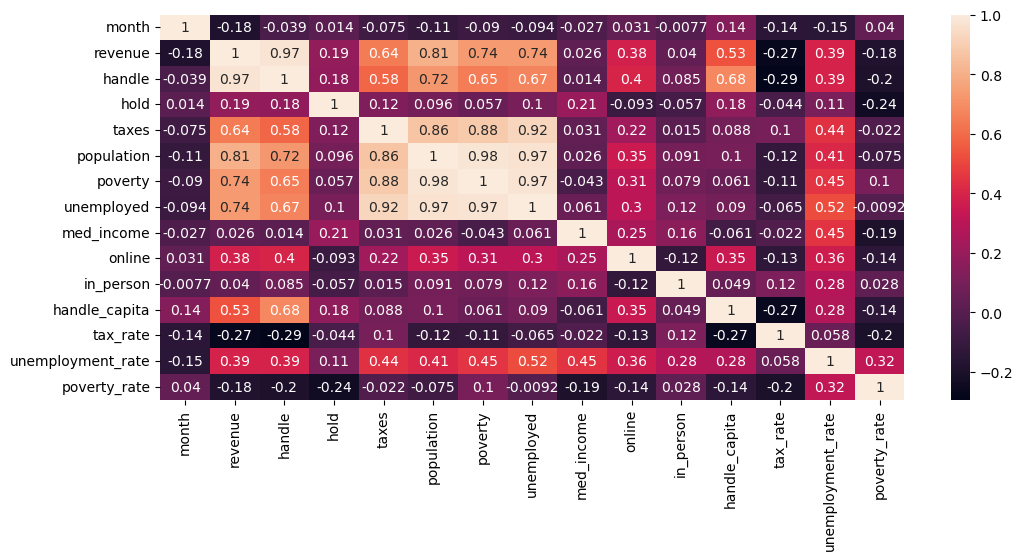

In [16]:
# Even though we won't need a lot of it, just out of curiosity I will create a heatmap.
correlations_matrix = df_state2.corr()
plt.figure(figsize = (12,5))
sns.heatmap(correlations_matrix, annot=True)
plt.show()

### Correlation matrix without Nevada and Washington DV since Nevada is a special case and Washington DC no real state
Just out of curiosity

In [17]:
dfx= df_state.reset_index()

In [18]:
dfx = dfx[~ dfx['state'].isin(['Nevada','Washington DC'])]

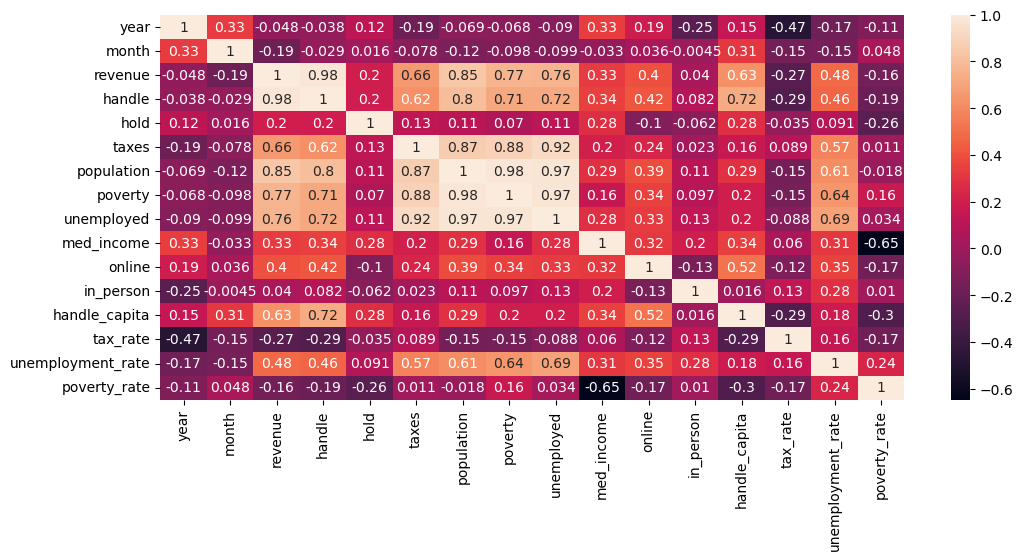

In [19]:
correlations_matrix = dfx.corr()
plt.figure(figsize = (12,5))
sns.heatmap(correlations_matrix, annot=True)
plt.show()

#### The heatmap revealed a lot more information than I thought!

1. Obiously the handle has big correlation with population data, including poverty and unemployed. This doesn't give us insight because the reason is simply the larger number of people.

2. Handle per capita is more interesting. We can see that there is a significant correlation with the legal status of online gambling. Aslo, albeit not that strong, we see correlation with the unemployment rate, nevertheless not with the poverty rate!

3. There is negative correlation between tax rate and handle per capita, apparently the state is able to control the magnitude of gambling with taxes.

4. The hold, which represents how many percent of the handle the providers manage to keep as revenue, is higher where there is more gambling in total, as well as where people spend more per capita.

#### Now we will look at some basic plots.

In [20]:
df_state = df_state.reset_index()

In [21]:
df_state.columns

Index(['state', 'year', 'month', 'revenue', 'handle', 'hold', 'taxes',
       'population', 'poverty', 'unemployed', 'med_income', 'online',
       'in_person', 'handle_capita', 'tax_rate', 'unemployment_rate',
       'poverty_rate'],
      dtype='object')

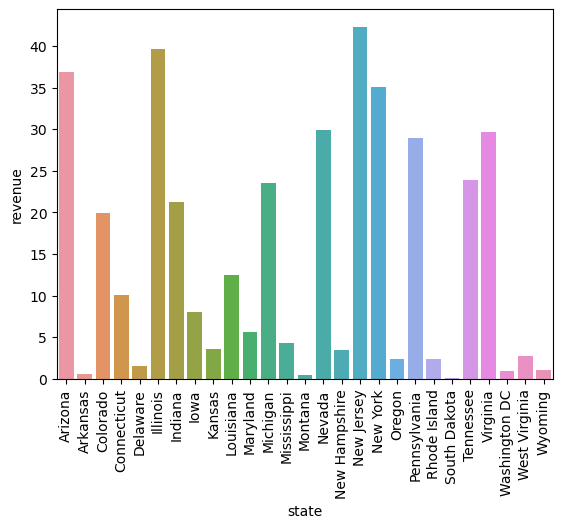

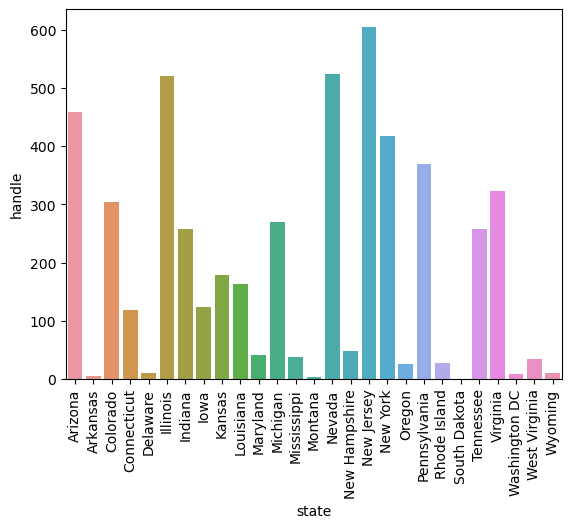

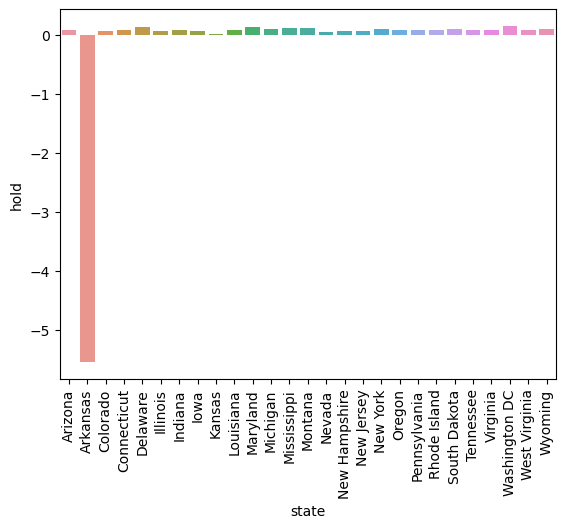

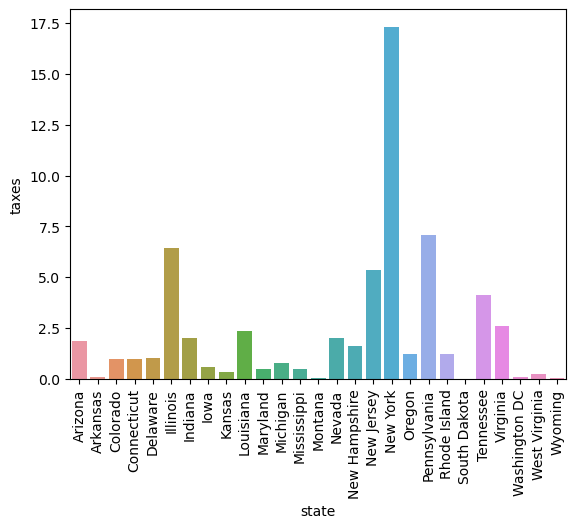

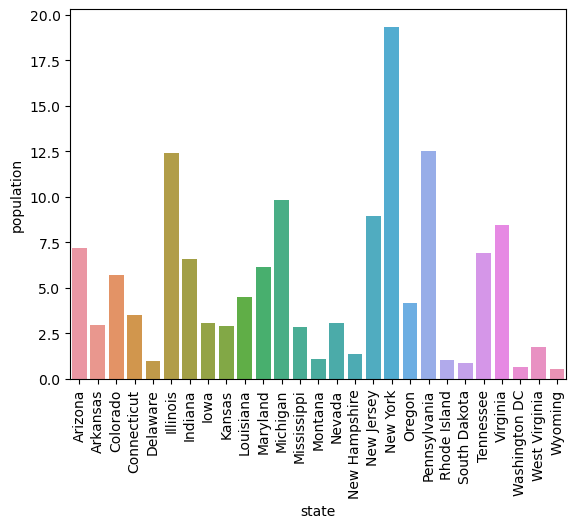

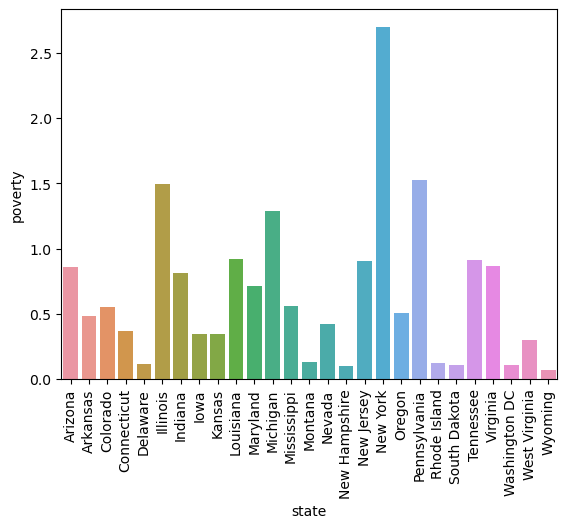

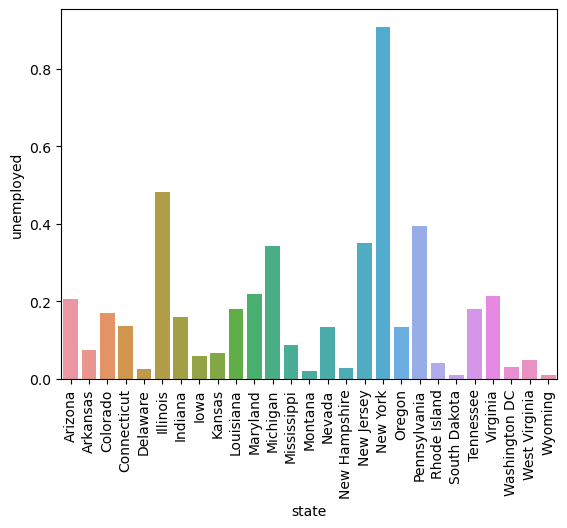

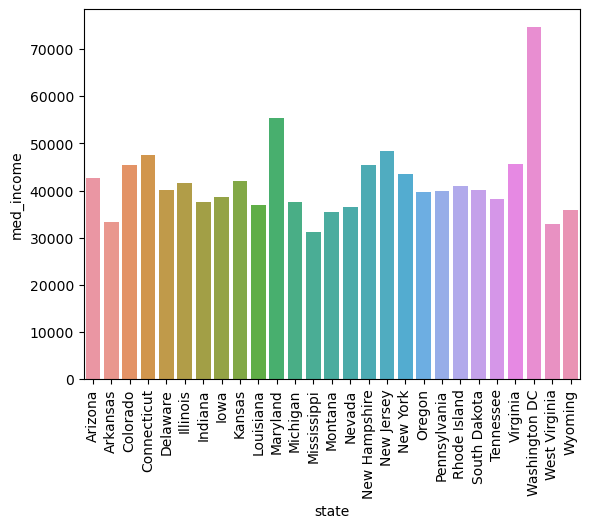

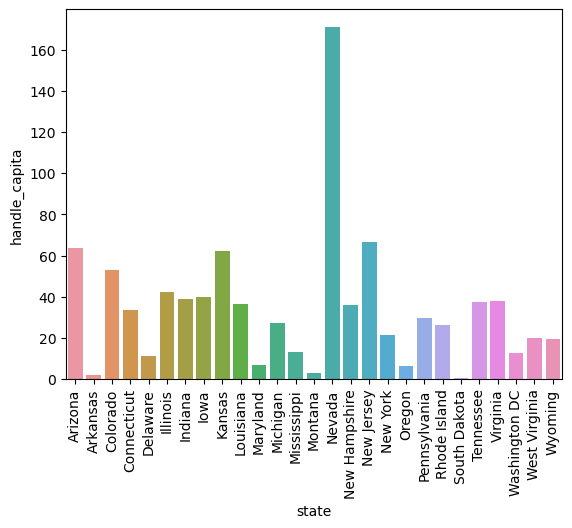

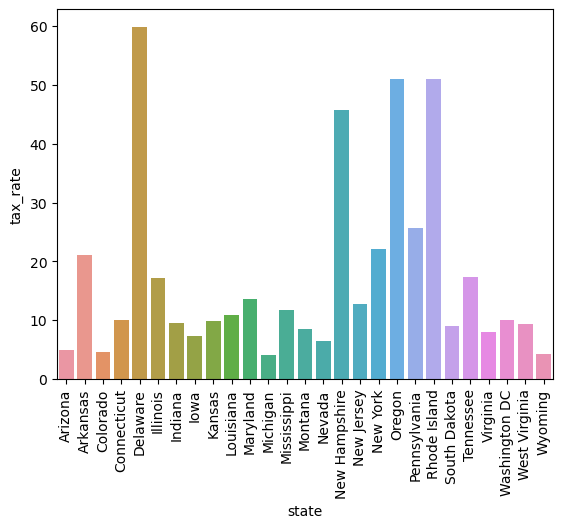

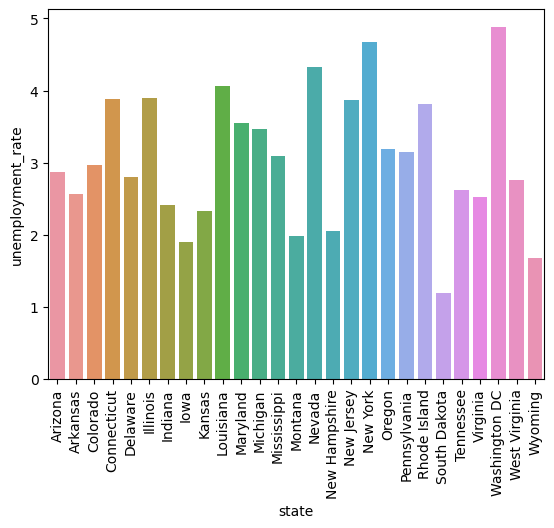

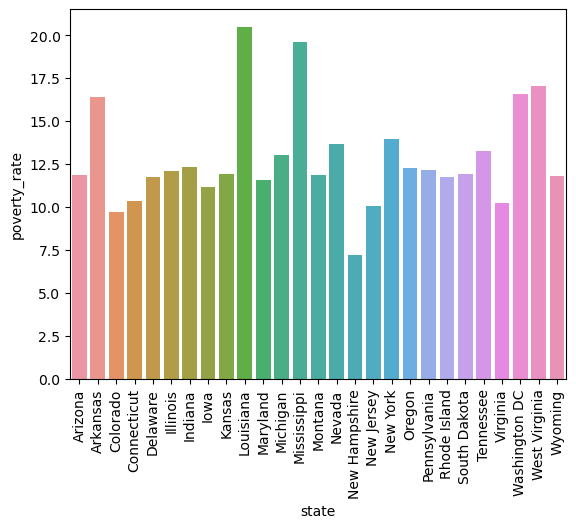

In [22]:
# First some information by state
for c in ['revenue', 'handle', 'hold', 'taxes',
       'population', 'poverty', 'unemployed', 'med_income',
       'handle_capita', 'tax_rate', 'unemployment_rate',
       'poverty_rate']:
    sns.barplot(data=df_state, x='state', y=c, ci = None)
    plt.xticks(rotation='vertical')
    plt.show()

We can that New York and Illinois are dominating the market with their huge Population sizes.
Especially NY is able to convert this into significant tax revenues.

Nevada has also a huge market share especially considering the population size, but the taxes generated through it are relatively small.

We see Delaware, New Hampshire, Pennsylvania and Rhode Island with a massive tax rate of above 40%,
which puts some pressure on the amount spent per capita, but not in a way to put them being the least active gambling markets.

### The hold in Arkansas
For Aransas we can see one massively negative value for the hold, this is because in the month betting was haltet because of the corona pandemic, we will leave it as is, and maybe exclude the value if it is problematic for the presentation down the line.


## More Plots to investigate

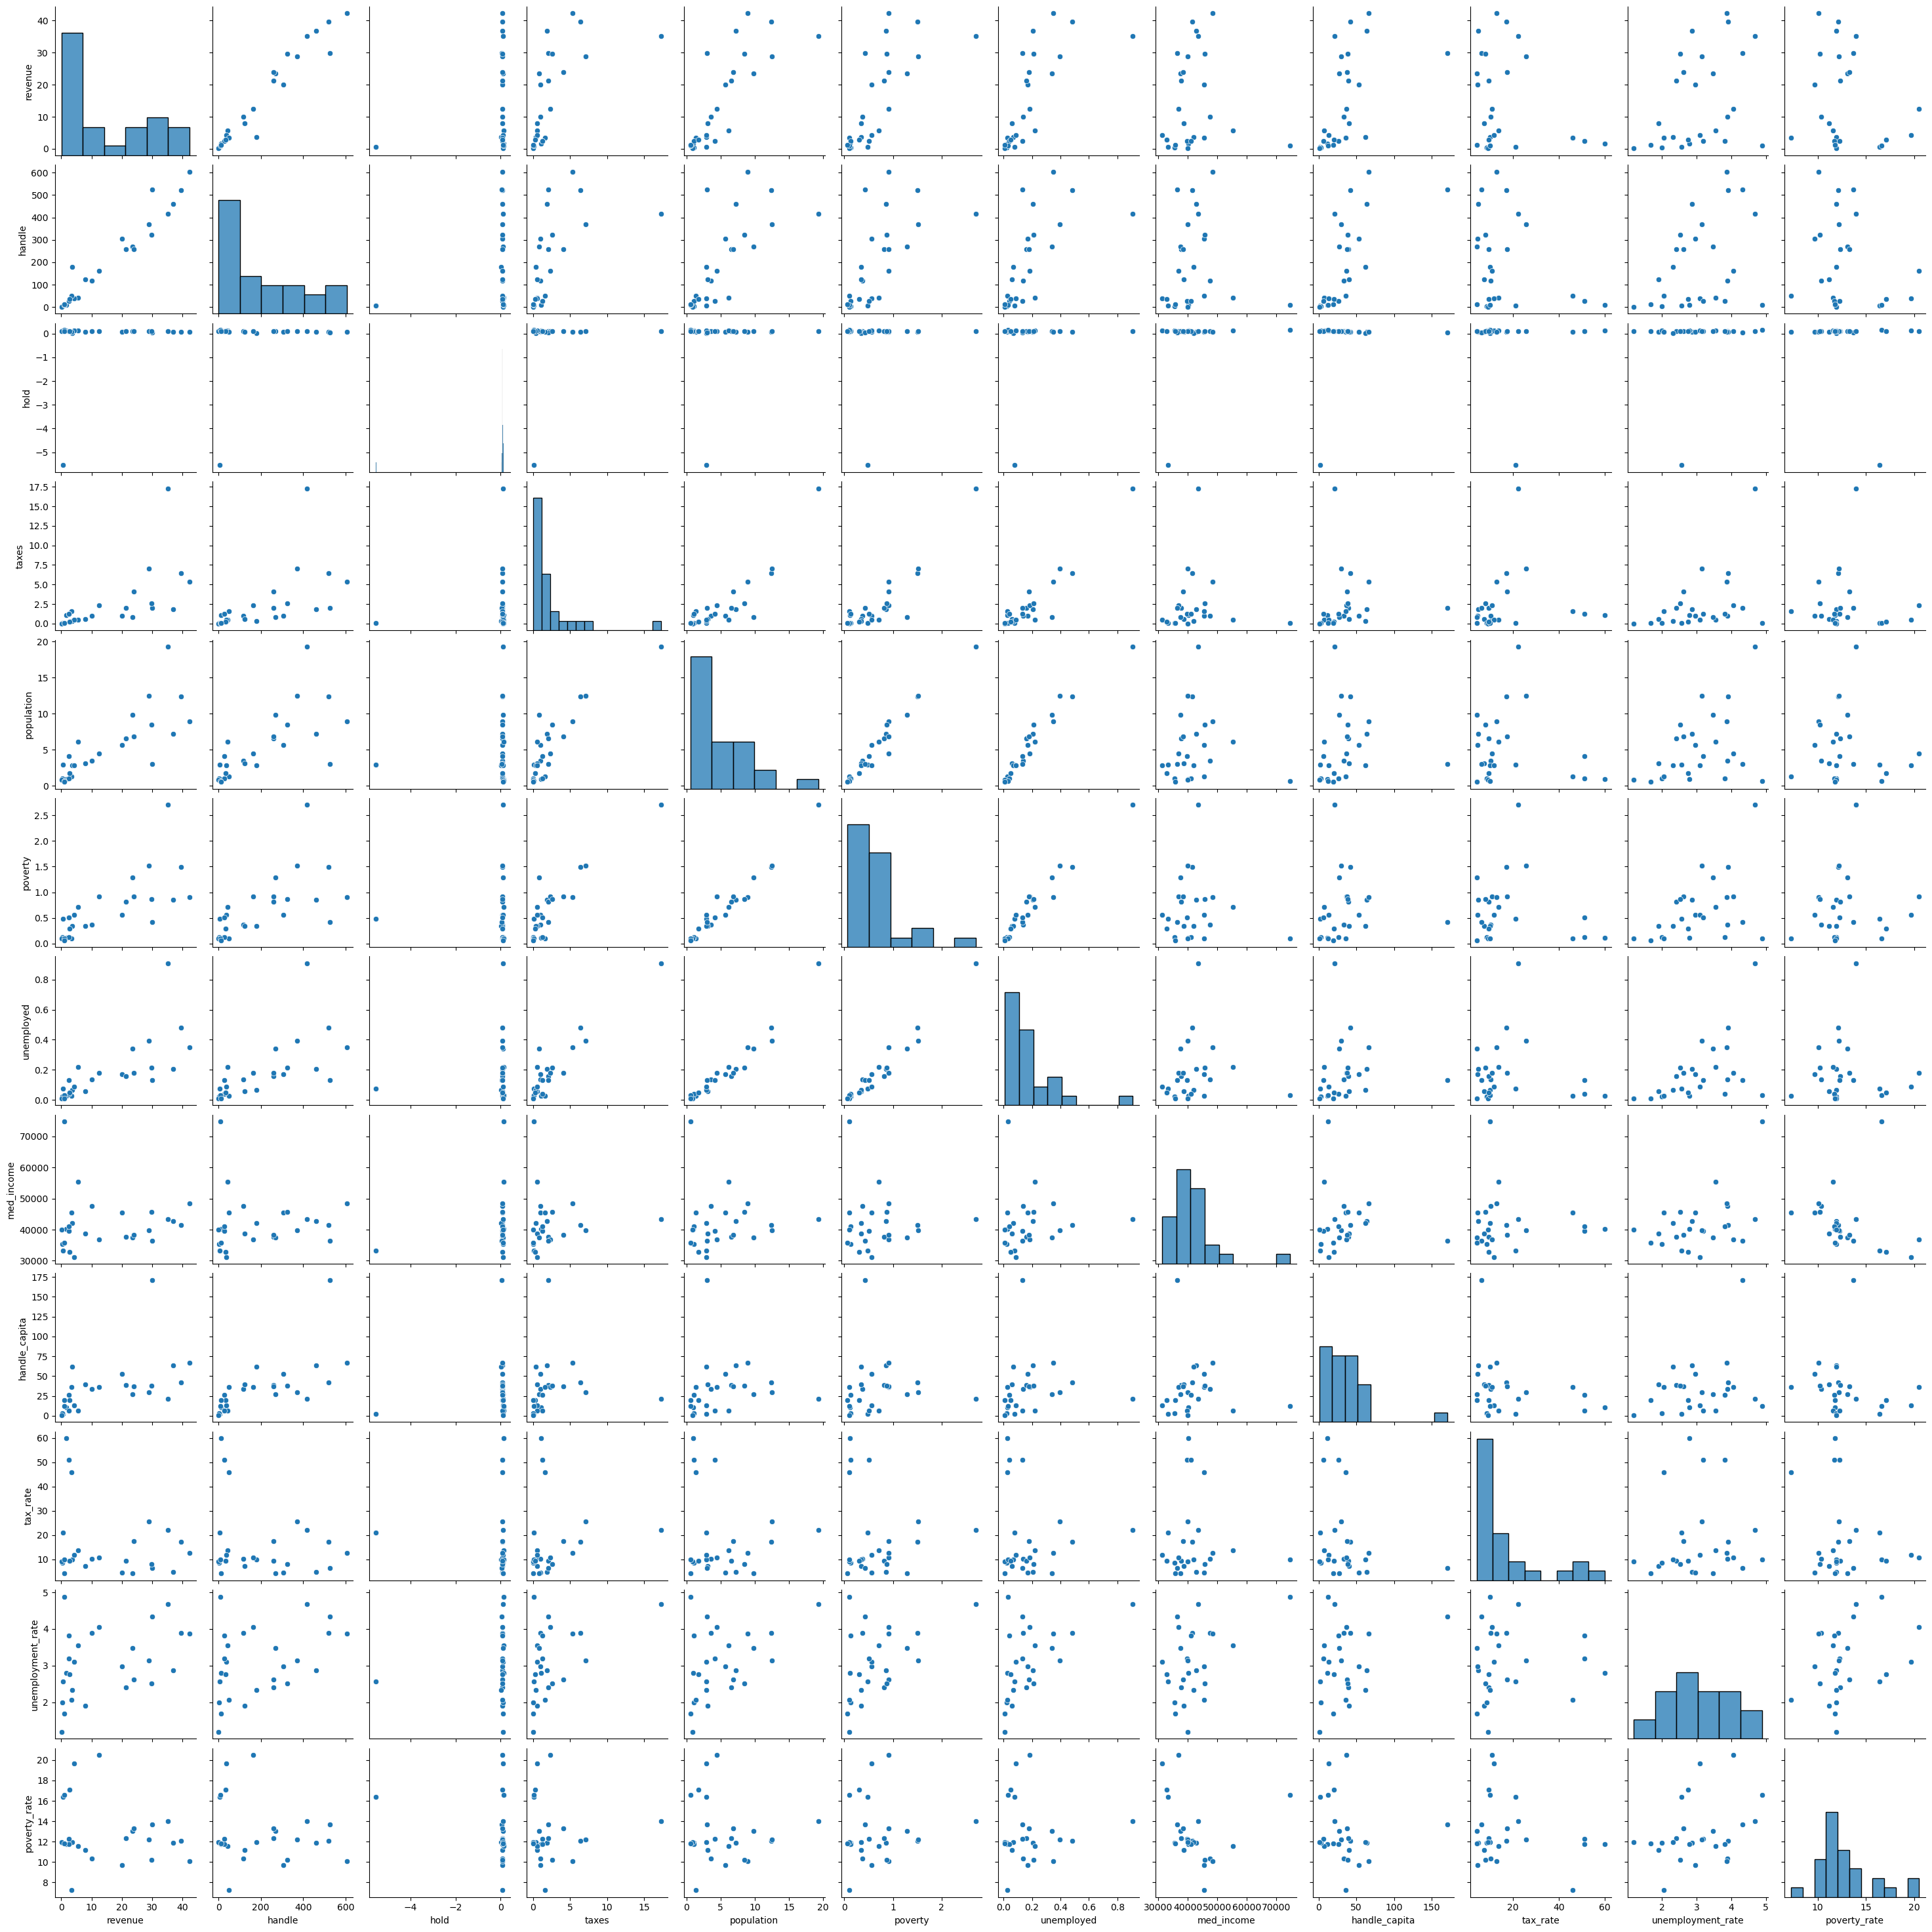

In [23]:
df_pp = df_state[['revenue', 'handle', 'hold', 'taxes',
       'population', 'poverty', 'unemployed', 'med_income',
       'handle_capita', 'tax_rate', 'unemployment_rate',
       'poverty_rate']]
sns.pairplot(df_pp)
plt.show()

In the pairplot we only see the same correlations as earlier.

# Further calculations for the Hypothesis testing

## Adding a tax grooup

In [24]:
# We calculate a group for the tax rate, Low <= 8%, Medium 8% - 30%, High > 30%
# For states which don't allow sports betting we insert No rate

In [26]:
def tax_group(trate):
    if trate < 8:
        return 'Low'
    elif trate > 8 and trate < 30:
        return 'Medium'
    elif trate > 30:
        return 'High'

In [27]:
# We fill the NaN we created when calculating the tax rate (appeared obviously because of division by 0) with 0
df = df.fillna(0)
df.head(3)

,year,month,state,revenue,handle,hold,taxes,population,poverty,unemployed,med_income,online,in_person,handle_capita,tax_rate,unemployment_rate,poverty_rate
896,2018,0.0,Alabama,0.0,0.0,0.0,0.0,4.763828,0.800422,0.124054,31962.0,0.0,0.0,0.0,0.0,2.604082,16.802076
940,2019,0.0,Alabama,0.0,0.0,0.0,0.0,4.754288,0.795989,0.129829,31962.0,0.0,0.0,0.0,0.0,2.730777,16.742549
978,2020,0.0,Alabama,0.0,0.0,0.0,0.0,4.771614,0.762642,0.123105,32080.0,0.0,0.0,0.0,0.0,2.579945,15.982894


In [28]:
df['tax_group'] = df['tax_rate'].apply(tax_group)
df.head(20)

,year,month,state,revenue,handle,hold,taxes,population,poverty,unemployed,med_income,online,in_person,handle_capita,tax_rate,unemployment_rate,poverty_rate,tax_group
896,2018,0.0,Alabama,0.000000,0.000000,0.00,0.000000,4.763828,0.800422,0.124054,31962.000000,0.0,0.0,0.000000,0.000000,2.604082,16.802076,Low
940,2019,0.0,Alabama,0.000000,0.000000,0.00,0.000000,4.754288,0.795989,0.129829,31962.000000,0.0,0.0,0.000000,0.000000,2.730777,16.742549,Low
978,2020,0.0,Alabama,0.000000,0.000000,0.00,0.000000,4.771614,0.762642,0.123105,32080.000000,0.0,0.0,0.000000,0.000000,2.579945,15.982894,Low
1010,2021,0.0,Alabama,0.000000,0.000000,0.00,0.000000,4.920613,0.794326,0.122512,34925.000000,0.0,0.0,0.000000,0.000000,2.489771,16.142826,Low
897,2018,0.0,Alaska,0.000000,0.000000,0.00,0.000000,0.720869,0.078620,0.025392,40334.000000,0.0,0.0,0.000000,0.000000,3.522415,10.906281,Low
941,2019,0.0,Alaska,0.000000,0.000000,0.00,0.000000,0.719376,0.076933,0.026715,40334.000000,0.0,0.0,0.000000,0.000000,3.713635,10.694407,Low
979,2020,0.0,Alaska,0.000000,0.000000,0.00,0.000000,0.719445,0.074369,0.026291,40471.000000,0.0,0.0,0.000000,0.000000,3.654345,10.336996,Low
1011,2021,0.0,Alaska,0.000000,0.000000,0.00,0.000000,0.716769,0.075165,0.024603,41962.000000,0.0,0.0,0.000000,0.000000,3.432487,10.486642,Low
898,2018,0.0,Arizona,0.000000,0.000000,0.00,0.000000,7.013444,0.983499,0.178702,34397.000000,1.0,1.0,0.000000,0.000000,2.547992,14.023053,Low
942,2019,0.0,Arizona,0.000000,0.000000,0.00,0.000000,6.891224,1.043764,0.192560,34397.000000,1.0,1.0,0.000000,0.000000,2.794279,15.146279,Low


# Saving for later use

In [29]:
# As csv
df.to_csv('Clean Data/expanded_clean.csv', index=False)